In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading the train dataset
df = pd.read_csv(r'C:\Users\RISHABH\Documents\Knight ML Assignment\Data\train.csv',na_values=NaN)
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Exploratory Data Analysis

In [3]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [4]:
# Count for the null values. 
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [5]:
# Information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [6]:
# Shape of the data
df.shape

(82657, 12)

In [7]:
# Description of the 'object' data type present in the data.
df.describe(include=['object'])

,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,358,1019,17,13786,28
top,@vossroger,US,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Concentrated blackberry and prune aromas are w...,Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,25736,3334,7503,175,10587


In [8]:
# Count for the values in target variable.
df.variety.value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [9]:
# No. of unique classes in the target variable
df.variety.nunique()

28

### Prices of reviewed Wine by Country and Variety

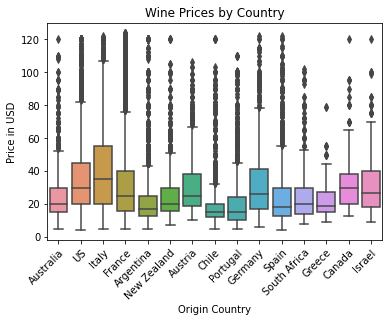

In [10]:
prices_by_country = df[["price", "country"]].dropna(how = "any")

# Remove all data greater than the 98th percentile
val = prices_by_country["price"].quantile(0.98)
prices_by_country = prices_by_country[prices_by_country["price"] < val]

# Only consider countries where at least 100 wines have been reviewed
prices_by_country = prices_by_country.groupby("country").filter(lambda x: (x["price"].count() >= 100))

# Creating a boxplot
ax = sb.boxplot(x="country", y = "price", data=prices_by_country)

# Setting title 
ax.set_title("Wine Prices by Country")

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

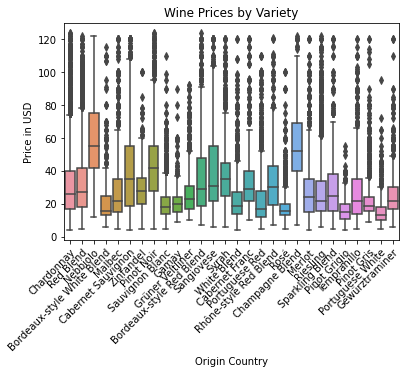

In [11]:
prices_by_variety = df[["price", "variety"]].dropna(how = "any")

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
prices_by_variety = prices_by_variety[prices_by_variety["price"] < val]

# Only consider varieties where at least 500 wines have been reviewed
prices_by_variety = prices_by_variety.groupby("variety").filter(lambda x: (x["price"].count() >= 500))

# Creating a boxplot
ax = sb.boxplot(x="variety", y = "price", data=prices_by_variety)

# Setting title 
ax.set_title("Wine Prices by Variety")

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

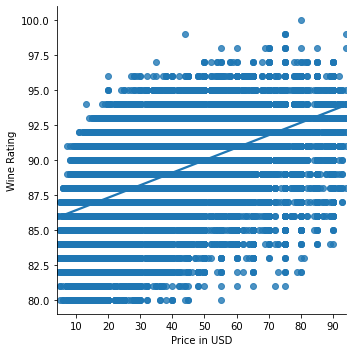

In [14]:
ratings_by_price = df[["price", "points"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

# Setting title


ax = sb.lmplot(x = "price", y = "points", data = ratings_by_price)

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Price in USD", ylabel = "Wine Rating")

plt.show()

In [15]:
df['review_description'][4]

'This ripe, sweet wine is rich and full of dried and fresh fruit flavors. It is spicy, with a touch of spirit on the palate as well as bold black-plum fruit, dense tannins and a sweet aftertaste. Drink from 2017.'

In [16]:
df['review_title'][4]

'Château du Cèdre 2012 Le Cèdre Vintage Malbec (Vin de Liqueur)'

In [17]:
df['variety'][4]

'Malbec'

In [18]:
df_encoded = df.copy()

In [19]:
# Converting the Categorical type to Numerical type 
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_encoded['variety'] = lb_make.fit_transform(df['variety'])
df_encoded['winery'] = lb_make.fit_transform(df['winery'])

df_encoded.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,399,5
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,9668,17
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,10873,11
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,5427,1
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,3789,9


In [20]:
df_encoded.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                  int32
variety                 int32
dtype: object

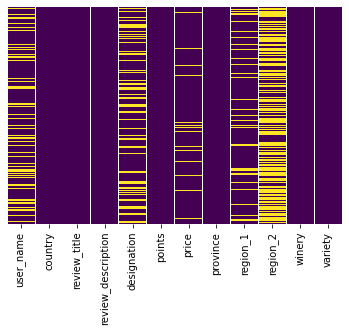

In [23]:
# Map showing the amount of null values present in each column.
sb.heatmap(df_encoded.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df_encoded['region_1'].isnull().sum()

12754

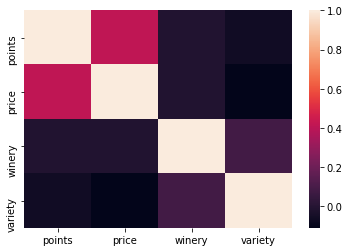

In [24]:
# Showing the correlation between the numerical features.
sb.heatmap(df_encoded.corr())

In [25]:
# Shape of the data
df_encoded.shape

(82657, 12)

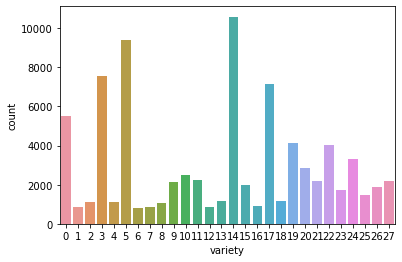

In [26]:
sb.countplot('variety',data=df_encoded)

In [27]:
# Store the feature matrix in 'X'
X = df_encoded[['review_title','review_description','points','price','winery']]

In [28]:
# Shape of 'X'
X.shape

(82657, 5)

In [29]:
X.head()

,review_title,review_description,points,price,winery
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,399
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,9668
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,10873
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,5427
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,3789


In [30]:
# Storing the response vector in 'y' 
y = df_encoded.variety

In [31]:
y.head()

0     5
1    17
2    11
3     1
4     9
Name: variety, dtype: int32

In [32]:
wine_r = df_encoded.copy()

In [33]:
# Importing the libraries for text analytics
from nltk.corpus import stopwords     # for removing all the stopwords
from nltk.stem.porter import PorterStemmer  # for stemming and lemmatization
# Initializing 
ps = PorterStemmer()

corpus = []
for i in range(0, len(wine_r)):
    review = re.sub('[^a-zA-Z]', ' ', wine_r['review_title'][i])
    review = review.lower()
    review = review.split()  # for the application of stop-words and stemming
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)  # combining all the spaces in the dataset
    corpus.append(review)

In [34]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [35]:
X.shape

(82657, 1000)

In [36]:
y = wine_r.variety

In [37]:
y.shape

(82657,)

In [38]:
## Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [39]:
# Top 20 feature names upto 3 words 
cv.get_feature_names()[:20]

['adig',
 'al',
 'albert',
 'alentejano',
 'alentejo',
 'alexand',
 'alexand valley',
 'alsac',
 'alt',
 'alta',
 'alto',
 'alto adig',
 'amador',
 'amador counti',
 'amaron',
 'amaron della',
 'amaron della valpolicella',
 'amiti',
 'amiti hill',
 'anderson']

In [40]:
# parameters in CountVectorizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [41]:
# dataset with the feature names
df_new = pd.DataFrame(X_train, columns=cv.get_feature_names())
df_new.head()

,adig,al,albert,alentejano,alentejo,alexand,alexand valley,alsac,alt,alta,...,zinfandel dri creek,zinfandel lodi,zinfandel napa,zinfandel napa valley,zinfandel paso,zinfandel paso robl,zinfandel russian,zinfandel russian river,zinfandel sonoma,zinfandel sonoma counti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Importing the class
from sklearn.naive_bayes import MultinomialNB
# Instantiate the model
classifier=MultinomialNB()

In [43]:
from sklearn import metrics
# Fit the model
classifier.fit(X_train, y_train)
# Predict on the testing set
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:", score)


Accuracy: 0.8690838435311801


#### Using a different model (Passive aggressive classifier) just to see that how our dataset is perforing on that.

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

In [46]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:", score)

Accuracy: 0.9227187740587308


In [47]:
# Importing the test data
df_test = pd.read_csv(r'C:\Users\RISHABH\Documents\Knight ML Assignment\Data\test.csv')
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [48]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [49]:
X_new = df[['review_title','review_description','points','price','winery']]

In [50]:
X_new.shape

(82657, 5)

In [51]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(wine_r)):
    review = re.sub('[^a-zA-Z]', ' ', X_new['review_title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [52]:
cv = CountVectorizer(max_features=1000,ngram_range=(1,3))
X_new = cv.fit_transform(corpus).toarray()

In [53]:
X_new.shape

(82657, 1000)

In [54]:
pred = classifier.predict(X_new)

In [55]:
len(pred)

82657